# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "citypy/worldcities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q=canillo&APPID=" + api_key
a_city = requests.get(base_url).json()
a_city

{'coord': {'lon': 1.67, 'lat': 42.58},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 274.5,
  'feels_like': 271.63,
  'temp_min': 272.04,
  'temp_max': 278.15,
  'pressure': 1010,
  'humidity': 74},
 'wind': {'speed': 0.74, 'deg': 94},
 'snow': {'3h': 0.19},
 'clouds': {'all': 81},
 'dt': 1579391976,
 'sys': {'type': 3,
  'id': 19636,
  'country': 'AD',
  'sunrise': 1579418321,
  'sunset': 1579452517},
 'timezone': 3600,
 'id': 3041203,
 'name': 'Canillo',
 'cod': 200}

In [6]:
base_url = "http://api.openweathermap.org/data/2.5/weather?APPID=" + api_key

city_data = []
for i, city in enumerate(cities):
    url = base_url + "&q=" + city
    print("Processing Record %s | %s" %(i,city))
    try:
        city_weather = requests.get(url).json()
        cloudiness=city_weather["clouds"]["all"]
        country=city_weather["sys"]["country"]
        date=city_weather["dt"]
        humidity=city_weather["main"]["humidity"]
        lat=city_weather["coord"]["lat"]
        lng=city_weather["coord"]["lon"]
        max_temp=city_weather["main"]["temp_max"]
        wind_speed=city_weather["wind"]["speed"]
        city_data.append({"City": city,
                         "Cloudiness": cloudiness,
                         "Country" : country,
                         "Date": date,
                         "Humidity": humidity,
                         "Lat": lat,
                         "Lng" : lng,
                         "Max Temp": max_temp,
                         "Wind Speed": wind_speed})
    except:
        print("City not found, skipping")
        pass

Processing Record 0 | ushuaia
Processing Record 1 | manzhouli
Processing Record 2 | karakol
Processing Record 3 | talnakh
Processing Record 4 | valle hermoso
Processing Record 5 | metsavan
Processing Record 6 | port elizabeth
Processing Record 7 | bubaque
Processing Record 8 | iqaluit
Processing Record 9 | thompson
Processing Record 10 | sioux lookout
Processing Record 11 | nuuk
Processing Record 12 | gogrial
Processing Record 13 | mar del plata
Processing Record 14 | hilo
Processing Record 15 | lebu
Processing Record 16 | pekalongan
Processing Record 17 | takoradi
Processing Record 18 | hobart
Processing Record 19 | provideniya
Processing Record 20 | hambantota
Processing Record 21 | ponta do sol
Processing Record 22 | ribeira grande
Processing Record 23 | kloulklubed
Processing Record 24 | a
City not found, skipping
Processing Record 25 | greensboro
Processing Record 26 | jamestown
Processing Record 27 | lata
Processing Record 28 | bosaso
Processing Record 29 | avarua
Processing Reco

Processing Record 237 | barrow
Processing Record 238 | szczytno
Processing Record 239 | ichikawa
Processing Record 240 | chake chake
Processing Record 241 | barentsburg
City not found, skipping
Processing Record 242 | ostrovnoy
Processing Record 243 | talaya
Processing Record 244 | angoche
Processing Record 245 | luderitz
Processing Record 246 | sabha
Processing Record 247 | asau
Processing Record 248 | maniitsoq
Processing Record 249 | whitehorse
Processing Record 250 | palm coast
Processing Record 251 | borgarnes
Processing Record 252 | ixtapa
Processing Record 253 | pundaguitan
Processing Record 254 | okhotsk
Processing Record 255 | ambon
Processing Record 256 | oyama
Processing Record 257 | narsaq
Processing Record 258 | paka
Processing Record 259 | kovur
Processing Record 260 | nalut
Processing Record 261 | torbay
Processing Record 262 | belmonte
Processing Record 263 | sentyabrskiy
City not found, skipping
Processing Record 264 | la orilla
Processing Record 265 | kidal
Processing

Processing Record 467 | dholka
Processing Record 468 | zielona gora
Processing Record 469 | zaysan
Processing Record 470 | beidao
Processing Record 471 | karamursel
Processing Record 472 | banda aceh
Processing Record 473 | lolua
City not found, skipping
Processing Record 474 | akdepe
Processing Record 475 | talcahuano
Processing Record 476 | suozhen
Processing Record 477 | bur gabo
City not found, skipping
Processing Record 478 | batticaloa
Processing Record 479 | ocampo
Processing Record 480 | kangaatsiaq
Processing Record 481 | iberia
Processing Record 482 | kharabali
Processing Record 483 | igarka
Processing Record 484 | puerto del rosario
Processing Record 485 | dujuma
City not found, skipping
Processing Record 486 | dali
Processing Record 487 | puerto baquerizo moreno
Processing Record 488 | sao joao da barra
Processing Record 489 | goderich
Processing Record 490 | linjiang
Processing Record 491 | san joaquin
Processing Record 492 | roebourne
Processing Record 493 | churapcha
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_df = pd.DataFrame(city_data)
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,75,AR,1579392232,76,-54.80,-68.30,283.15,11.80
1,manzhouli,42,CN,1579392232,94,49.60,117.43,250.43,1.08
2,karakol,0,KG,1579392233,35,42.49,78.39,261.78,1.33
3,talnakh,40,RU,1579392233,75,69.49,88.40,246.15,7.00
4,valle hermoso,90,MX,1579392235,57,25.67,-97.83,300.15,2.10


In [8]:
city_df.to_csv("City_Weather_Output.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
weather_df = pd.read_csv("City_Weather_Output.csv")
weather_df.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ushuaia,75,AR,1579392232,76,-54.80,-68.30,283.15,11.80
1,1,manzhouli,42,CN,1579392232,94,49.60,117.43,250.43,1.08
2,2,karakol,0,KG,1579392233,35,42.49,78.39,261.78,1.33
3,3,talnakh,40,RU,1579392233,75,69.49,88.40,246.15,7.00
4,4,valle hermoso,90,MX,1579392235,57,25.67,-97.83,300.15,2.10


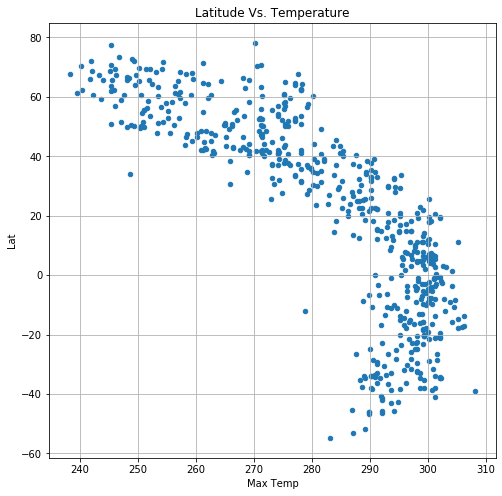

In [11]:
# Create a scatter plot which compares Latitude to Temp
weather_df.plot(kind="scatter", x="Max Temp", y="Lat", grid=True, figsize=(8,8), 
                      title="Latitude Vs. Temperature")
plt.savefig("./Plots/MaxTemp_vs_Lat_Scatter.png")
plt.show()

#I think I must have done something wrong during my API call because I am absolutely bewildered 
# that the Temp is showing as 240 degrees+....

#### Latitude vs. Humidity Plot

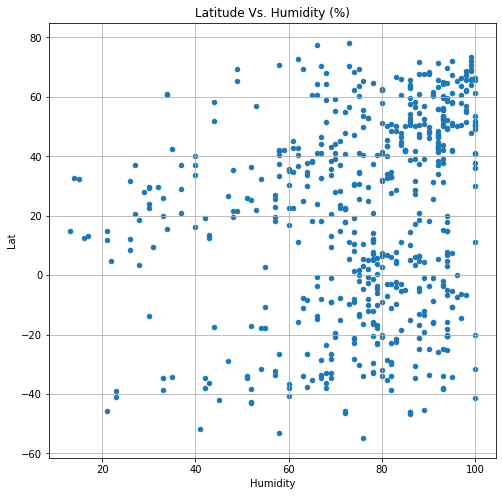

In [15]:
# Create a scatter plot which compares Latitude to Humidity
weather_df.plot(kind="scatter", x="Humidity", y="Lat", grid=True, figsize=(8,8), 
                      title="Latitude Vs. Humidity (%)")
plt.savefig("./Plots/Humudity_vs_Lat_Scatter.png")
plt.show()

# This plot makes sense to me because you can assume that the continent of Asia sees more humidity.

#### Latitude vs. Cloudiness Plot

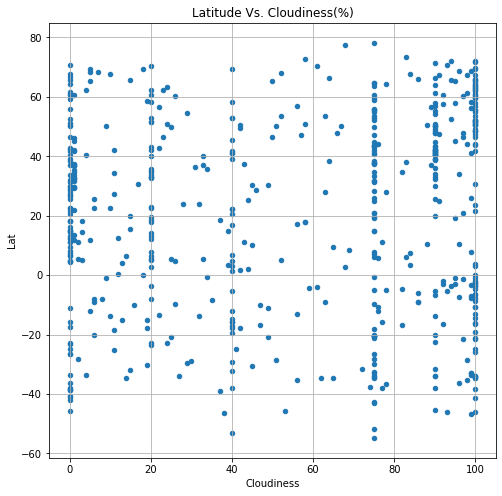

In [16]:
# Create a scatter plot which compares Latitude to Cloudiness
weather_df.plot(kind="scatter", x="Cloudiness", y="Lat", grid=True, figsize=(8,8), 
                      title="Latitude Vs. Cloudiness(%)")
plt.savefig("./Plots/Cloudiness_vs_Lat_Scatter.png")
plt.show()

#### Latitude vs. Wind Speed Plot

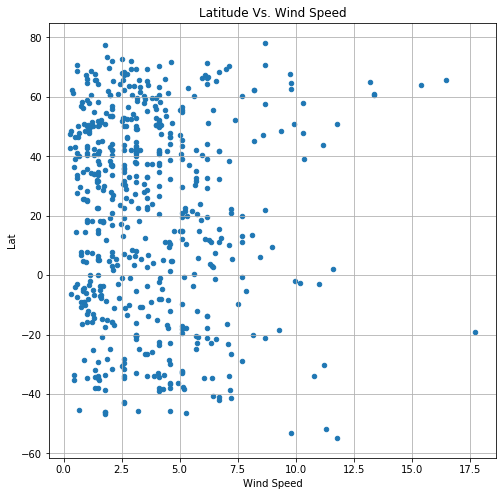

In [19]:
# Create a scatter plot which compares Latitude to Wind Speed
weather_df.plot(kind="scatter", x="Wind Speed", y="Lat", grid=True, figsize=(8,8), 
                      title="Latitude Vs. Wind Speed")
plt.savefig("./Plots/WindSpeed_vs_Lat_Scatter.png")
plt.show()

#  I guess this is showing that the wind is coming from the West and headed East.